In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
pd.set_option('display.width', 1000)


In [2]:
df=pd.read_csv(r"C:\Users\Federico\Google Drive\Progetti Jupyter\Tweepy\Tweet Lockdown\Tweet Lockdown inglese.csv")

In [3]:
df

,Unnamed: 0,Testo,Text
0,0,Stato Non puoi pagargli la Cassa Integrazione ...,Status You can't pay them the redundancy fund ...
1,1,Lockdown a Natale Ecco la previsione di Crisan...,Christmas lockdown Here is the prediction of C...
2,2,Io sono pi drastica tranne poche eccezioni non...,I am more drastic with a few exceptions they n...
3,3,Popolazione Lombardia 10060574 abitanti pi o m...,Population Lombardy 10060574 inhabitants more ...
4,4,Per implementare un lockdown in assenza di dic...,To implement a lockdown in the absence of a fo...
...,...,...,...
995,995,Solo a me fa strano vedere le persone nei film...,Solo a me fa strano vedere le persone nei film...
996,996,Il prezzo ingiusto post lockdown Presadiretta,Il prezzo ingiusto post lockdown Presadiretta
997,997,Durante il lockdown i miliardari hanno visto a...,Durante il lockdown i miliardari hanno visto a...
998,998,Questo nuovo Dpcm ha un forte e amarissimo sap...,This new Dpcm has a strong and very bitter tas...


In [4]:
df['Polarity'] = df['Text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [5]:
df['Subjectivity'] = df['Text'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

In [6]:
df = df.drop(df[df.Polarity == 0].index)

In [7]:
df

,Unnamed: 0,Testo,Text,Polarity,Subjectivity
2,2,Io sono pi drastica tranne poche eccezioni non...,I am more drastic with a few exceptions they n...,0.150000,0.300000
3,3,Popolazione Lombardia 10060574 abitanti pi o m...,Population Lombardy 10060574 inhabitants more ...,0.166667,0.283333
4,4,Per implementare un lockdown in assenza di dic...,To implement a lockdown in the absence of a fo...,-0.012500,0.000000
6,6,Apro twitterLockdown2 lockdown Natale Lombardi...,I open twitterLockdown2 Christmas Lombardy loc...,0.045455,0.651515
9,9,Causa COVID19 rinunciamo pure ad una vacanza a...,Cause COVID19 we will also give up a holiday a...,0.416667,0.666667
...,...,...,...,...,...
983,983,PresaDiretta Quello che successo durante il lo...,Direct Taking What happened during the lockdow...,-0.008333,0.716667
984,984,MassimoGalli51 PiazzapulitaLA7 Non credo usand...,MassimoGalli51 PiazzapulitaLA7 I don't think u...,0.418182,0.527273
990,990,Ancora non deciso nulla sul blocco del calcett...,Still not decided anything on the block of soc...,-0.187500,0.312500
994,994,Quello che successo durante il lockdown solo l...,What happened during the lockdown is only the ...,-0.041667,0.916667


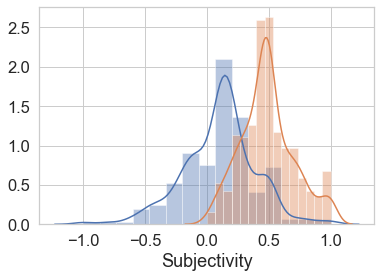

In [8]:
fig = sns.distplot(df.Polarity, bins=15)
fig1=sns.distplot(df.Subjectivity,bins=15)

In [9]:
media_pol_pos = df.Polarity[df.Polarity > 0].median()

In [10]:
media_pol_neg= df.Polarity[df.Polarity <0].median()

In [11]:
media_subj=df.Subjectivity.median()

In [12]:
data = {'Media_pol_pos':  [df.Polarity[df.Polarity > 0].median()],
        'media_pol_neg': [df.Polarity[df.Polarity <0].median()],
        "media_subj" :[df.Subjectivity.median()]
        }

In [17]:
df_medie= pd.DataFrame(data)
df_medie

,Media_pol_pos,media_pol_neg,media_subj
0,0.2,-0.166667,0.478914
